In [1]:
# for handling tabular data (like Excel) — used to load, manipulate, and analyze datasets
import pandas as pd

# for numerical operations — especially with arrays and matrices
import numpy as np

# for statistical tests like normality tests, t-tests, etc.
import scipy.stats as stats

# for plotting basic graphs like line charts, bar graphs, etc.
import matplotlib.pyplot as plt

# for advanced and visually appealing plots (built on top of matplotlib)
import seaborn as sns

# to split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# to evaluate model performance using cross-validation
from sklearn.model_selection import cross_val_score

# to check how accurate the model predictions are
from sklearn.metrics import accuracy_score

# to use Logistic Regression algorithm for classification problems
from sklearn.linear_model import LogisticRegression

# to use Decision Tree algorithm for classification problems
from sklearn.tree import DecisionTreeClassifier

# to apply custom functions as transformers (useful in pipelines)
from sklearn.preprocessing import FunctionTransformer

# to apply different preprocessing steps to different columns
from sklearn.compose import ColumnTransformer

In [2]:
# load only selected columns ('Age', 'Fare', 'Survived') from the CSV file into a DataFrame
df = pd.read_csv('train.csv', usecols=['Age', 'Fare', 'Survived'])

# display the first 5 rows of the DataFrame to get a quick look at the data
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
# check how many missing (null) values are present in each column
df.isnull().sum()

,0
Survived,0
Age,177
Fare,0


In [4]:
# fill missing values in the 'Age' column with the mean age
df['Age'].fillna(df['Age'].mean(), inplace=True)

/tmp/ipython-input-1216786871.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [5]:
# select 'Fare' and 'Survived' columns as features (x)
x = df.iloc[:, 1:3]

# select 'Age' column as target (y)
y = df.iloc[:, 0]

## **Train Test Split**

In [6]:
# split the data into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

/tmp/ipython-input-2857508591.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'])  # shows how 'Age' values are distributed (PDF)


Text(0.5, 1.0, 'Age QQ Plot')

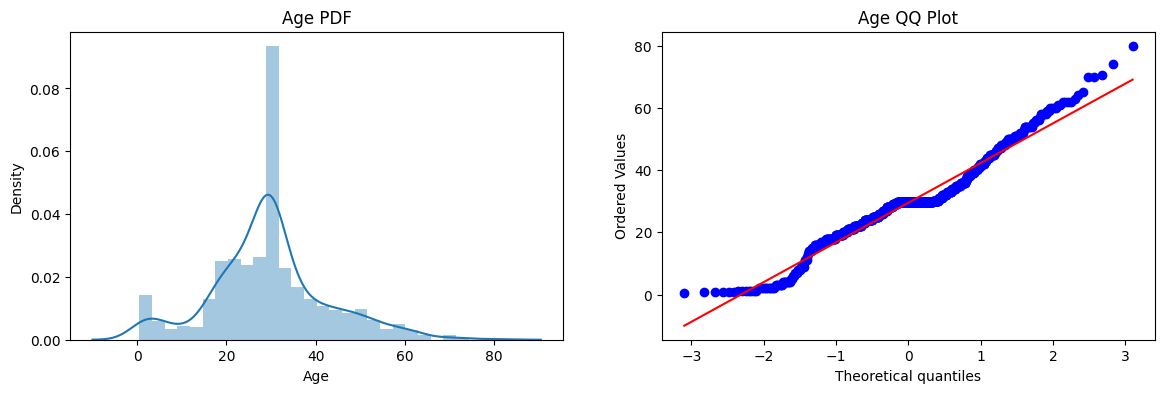

In [7]:
# set the overall size of the figure (14 inches wide, 4 inches high)
plt.figure(figsize=(14, 4))

# create the first subplot: 1 row, 2 columns, first plot
plt.subplot(121)

# plot the histogram and KDE (smoothed curve) of the 'Age' column from training data
sns.distplot(x_train['Age'])  # shows how 'Age' values are distributed (PDF)

# set the title for the first plot
plt.title('Age PDF')  # PDF = Probability Density Function

# create the second subplot: 1 row, 2 columns, second plot
plt.subplot(122)

# generate a QQ (Quantile–Quantile) plot to check if 'Age' follows a normal distribution
stats.probplot(x_train['Age'], dist='norm', plot=plt)

# set the title for the QQ plot
plt.title('Age QQ Plot')  # QQ plot helps visually check normality

/tmp/ipython-input-299685898.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Fare'])  # shows how 'Fare' values are spread out


Text(0.5, 1.0, 'Fare QQ Plot')

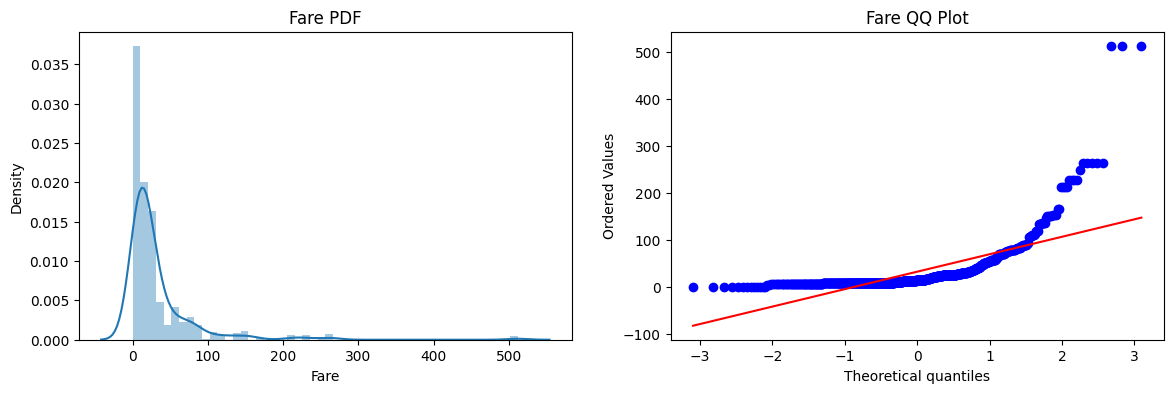

In [8]:
# set the size of the entire figure to 14 inches wide and 4 inches tall
plt.figure(figsize=(14, 4))

# create the first subplot: 1 row, 2 columns, this is the 1st plot
plt.subplot(121)

# plot the distribution (histogram + KDE) of the 'Fare' column in training data
sns.distplot(x_train['Fare'])  # shows how 'Fare' values are spread out

# set the title of the first plot
plt.title('Fare PDF')  # PDF = Probability Density Function

# create the second subplot: 1 row, 2 columns, this is the 2nd plot
plt.subplot(122)

# create a QQ (Quantile–Quantile) plot to compare 'Fare' distribution with a normal distribution
stats.probplot(x_train['Fare'], dist='norm', plot=plt)

# set the title of the second plot
plt.title('Fare QQ Plot')  # checks if 'Fare' is normally distributed

## **Training Without Transform**

In [9]:
# create a Logistic Regression model
clf = LogisticRegression()

# create a Decision Tree Classifier model
clf2 = DecisionTreeClassifier()

In [10]:
# train the Logistic Regression & Decision Tree Classifier models on training data
clf.fit(x_train, y_train)
clf2.fit(x_train, y_train)

# predict the target values using the trained Logistic Regression & Decision Tree models
y_pred = clf.predict(x_test)
y_pred2 = clf2.predict(x_test)

# print the accuracy of the Logistic Regression & Decision Tree models
print("Accuracy LR", accuracy_score(y_test, y_pred))
print("Accuracy DT", accuracy_score(y_test, y_pred2))

Accuracy LR 0.6480446927374302
Accuracy DT 0.664804469273743


## **Doing Transform**
- np.log(x) gives an error if x = 0 (log(0) is undefined)
- np.log1p(x) = log(1 + x), so it safely handles x = 0 without error

In [11]:
# create a transformer that applies log1p to make data more normally distributed
trf = FunctionTransformer(func=np.log1p)

In [12]:
# apply log1p transformation to training data to reduce skewness
x_train_transformed = trf.fit_transform(x_train)

# apply the same transformation to test data using parameters learned from training data
x_test_transformed = trf.transform(x_test)

In [13]:
# create objects of logisticregression and decisiontreeclassifier
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

# train logisticregression and decisiontree model on transformed training data
clf.fit(x_train_transformed, y_train)
clf2.fit(x_train_transformed, y_train)

# predict target variable using logisticregression and decisiontree on transformed test data
y_pred = clf.predict(x_test_transformed)
y_pred2 = clf2.predict(x_test_transformed)

# print accuracy of logisticregression and decisiontree
print("accuracy lr", accuracy_score(y_test, y_pred))
print("accuracy dt", accuracy_score(y_test, y_pred2))

accuracy lr 0.6815642458100558
accuracy dt 0.6815642458100558


In [14]:
# apply log1p transformation to the full dataset
# this is done to evaluate the model on the whole dataset using cross-validation
x_transformed = trf.fit_transform(x)

# create a new logisticregression and decisiontreeclassifier model
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

# perform 10-fold cross-validation for both models
# - data is split into 10 equal parts
# - each model is trained on 9 parts and tested on the 1 remaining part
# - this process repeats 10 times so every part is used once for testing
# - average accuracy from all 10 rounds is calculated and printed
# - helps compare performance of logisticregression and decisiontree more reliably
print("lr", np.mean(cross_val_score(clf, x_transformed, y, cv=10, scoring='accuracy')))
print("dt", np.mean(cross_val_score(clf2, x_transformed, y, cv=10, scoring='accuracy')))

lr 0.678027465667915
dt 0.6599625468164795


## **Transform & QQ Plots**

Text(0.5, 1.0, 'fare after log')

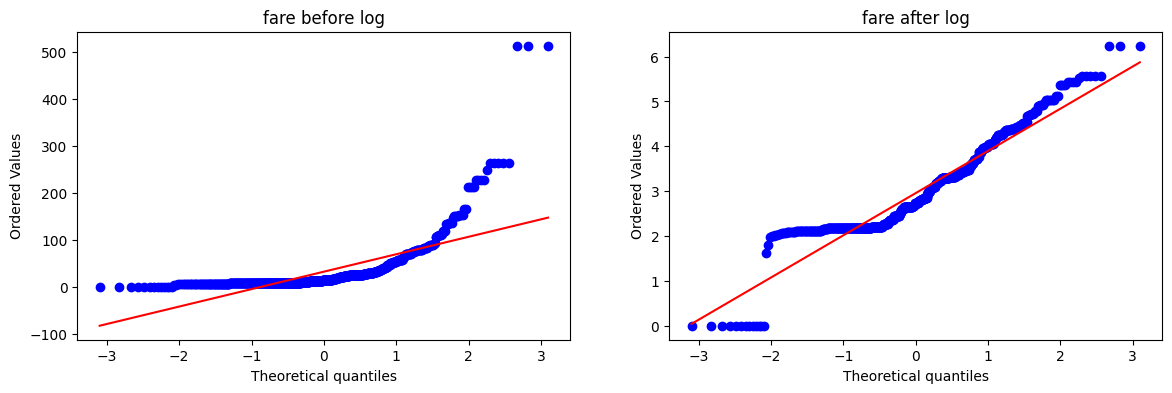

In [15]:
# set the size of the full figure (14 inches wide and 4 inches tall)
plt.figure(figsize=(14, 4))

# first subplot: plot a qq plot for 'fare' before log transformation
plt.subplot(121)  # 1 row, 2 columns, position 1
stats.probplot(x_train['Fare'], dist="norm", plot=plt)  # checks if 'fare' follows a normal distribution
plt.title('fare before log')  # title of the first plot

# second subplot: plot a qq plot for 'fare' after log transformation
plt.subplot(122)  # 1 row, 2 columns, position 2
stats.probplot(x_train_transformed['Fare'], dist="norm", plot=plt)  # checks if transformed 'fare' is closer to normal
plt.title('fare after log')  # title of the second plot

Text(0.5, 1.0, 'age after log')

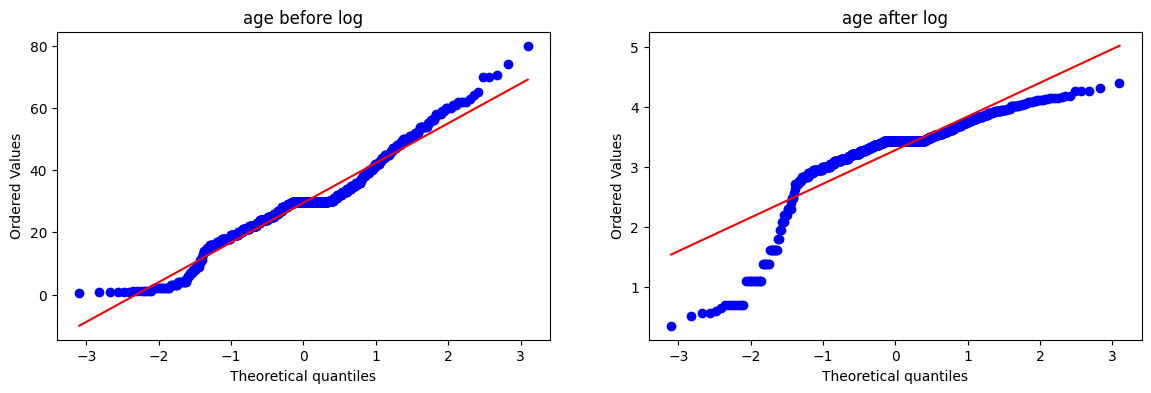

In [16]:
# set the size of the entire figure (14 inches wide and 4 inches tall)
plt.figure(figsize=(14, 4))

# first subplot: qq plot of 'age' before applying log transformation
plt.subplot(121)  # 1 row, 2 columns, first plot
stats.probplot(x_train['Age'], dist="norm", plot=plt)  # check if 'age' follows a normal distribution
plt.title('age before log')  # title for the first plot

# second subplot: qq plot of 'age' after applying log transformation
plt.subplot(122)  # 1 row, 2 columns, second plot
stats.probplot(x_train_transformed['Age'], dist="norm", plot=plt)  # check if log-transformed 'age' is closer to normal
plt.title('age after log')  # title for the second plot

Age doesn't look good after log transform

## **Adding Log Transform only to Fare**

In [17]:
# create a column transformer
# - applies log1p transformation only to the 'fare' column
# - keeps other columns, like 'age', unchanged using 'passthrough'
trf2 = ColumnTransformer([('log', FunctionTransformer(np.log1p), ['Fare'])], remainder='passthrough')

# transform the training data using the transformer
x_train_transformed = trf2.fit_transform(x_train)

# transform the test data using the same fitted transformer (do not fit again)
x_test_transformed = trf2.transform(x_test)

In [18]:
# create two classification models: logistic regression and decisiontreeclassifier
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

# train both models using the transformed training data
clf.fit(x_train_transformed, y_train)
clf2.fit(x_train_transformed, y_train)

# predict the target values (age) for the transformed test data using both models
y_pred = clf.predict(x_test_transformed)
y_pred2 = clf2.predict(x_test_transformed)

# print the accuracy of both models on the test set
# this shows how well the models are predicting 'age' values from 'fare'
print("accuracy lr", accuracy_score(y_test, y_pred))   # logistic regression accuracy
print("accuracy dt", accuracy_score(y_test, y_pred2))  # decision tree accuracy

accuracy lr 0.6703910614525139
accuracy dt 0.6703910614525139


In [19]:
# apply column transformer on full dataset x
# this applies log(1 + x) on Fare column
# this is done before cross validation
x_transformed2 = trf2.fit_transform(x)

# create LogisticRegression model
clf = LogisticRegression()

# create DecisionTreeClassifier model
clf2 = DecisionTreeClassifier()

# perform 10 fold cross validation on LogisticRegression
# split data into 10 parts
# train on 9 parts and test on 1 part
# repeat process 10 times
# calculate accuracy each time
# take mean of all accuracy scores
print("LR", np.mean(cross_val_score(clf, x_transformed2, y, cv=10, scoring='accuracy')))

# perform same 10 fold cross validation for DecisionTreeClassifier
print("DT", np.mean(cross_val_score(clf2, x_transformed2, y, cv=10, scoring='accuracy')))

LR 0.6712609238451936
DT 0.6599375780274656


## **Applying Various Transforms**

In [20]:
# define a function to transform Fare column and check model accuracy
def apply_transform(transform):

  # select input features from dataframe
  x = df.iloc[:, 1:3]  # Fare and Survived

  # select target column
  y = df.iloc[:, 0]    # Age

  # create ColumnTransformer to apply given transform on Fare
  trf = ColumnTransformer(
      [('log', FunctionTransformer(transform), ['Fare'])],
      remainder='passthrough'
  )

  # apply transformation on input data
  x_trans = trf.fit_transform(x)

  # create LogisticRegression model
  clf = LogisticRegression()

  # perform 10 fold cross validation
  # calculate accuracy for each fold
  # print mean accuracy
  print("Accuracy", np.mean(cross_val_score(clf, x_trans, y, scoring='accuracy', cv=10)))

  # create figure for qq plots
  plt.figure(figsize=(14, 4))

  # qq plot of Fare before transformation
  plt.subplot(121)
  stats.probplot(x['Fare'], dist='norm', plot=plt)
  plt.title('Fare Before Transform')

  # qq plot of Fare after transformation
  plt.subplot(122)
  stats.probplot(x_trans[:, 0], dist='norm', plot=plt)
  plt.title('Fare After Transform')

  # show the plots
  plt.show()

Accuracy 0.6589013732833957


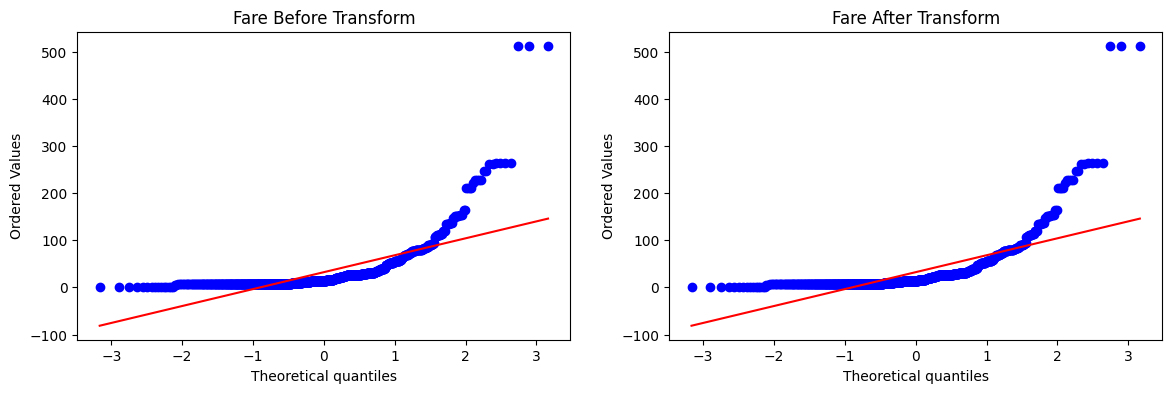

In [21]:
# call apply_transform function
# lambda x: x returns input as it is
# no transformation is applied on Fare
# used as baseline for comparison
apply_transform(lambda x: x)

Accuracy 0.6431335830212235


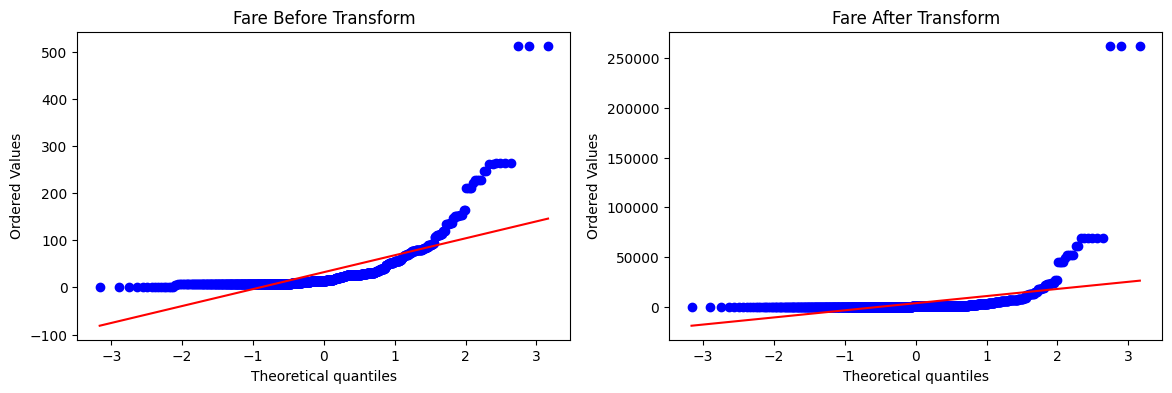

In [22]:
# call apply_transform function
# lambda x: x**2 applies square transformation
# squares all values of Fare
# used to see effect on distribution and accuracy
apply_transform(lambda x: x**2)

Accuracy 0.6262796504369538


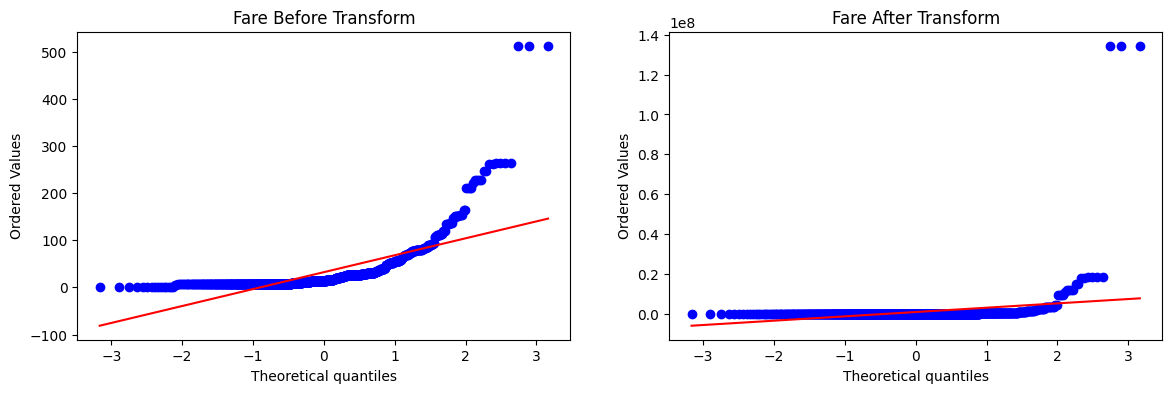

In [23]:
# call apply_transform function
# lambda x: x**3 applies cube transformation
# cubes all values of Fare
# makes large values more extreme
# used to check effect on distribution and accuracy
apply_transform(lambda x: x**3)

Accuracy 0.6611485642946316


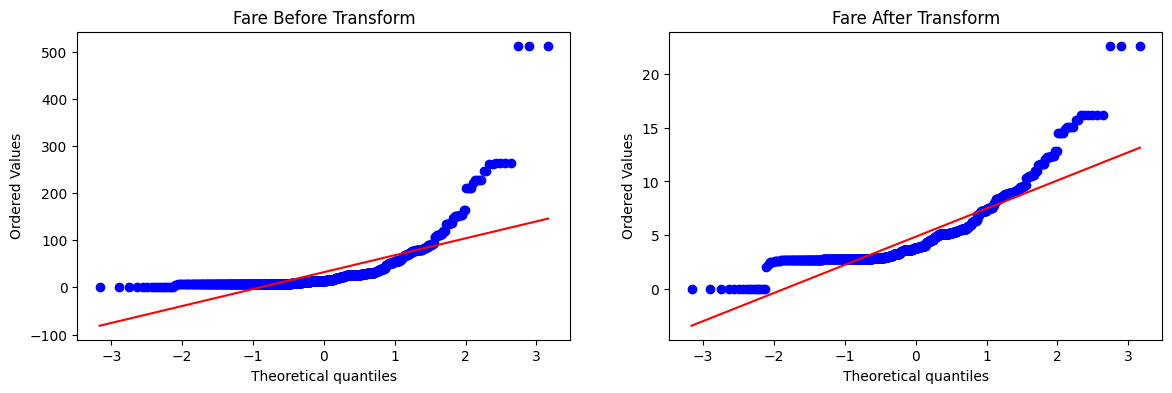

In [24]:
# call apply_transform function
# lambda x: x**0.5 applies square root transformation
# reduces effect of large Fare values
# helps handle right skewed data
apply_transform(lambda x: x**0.5)

Accuracy 0.61729088639201


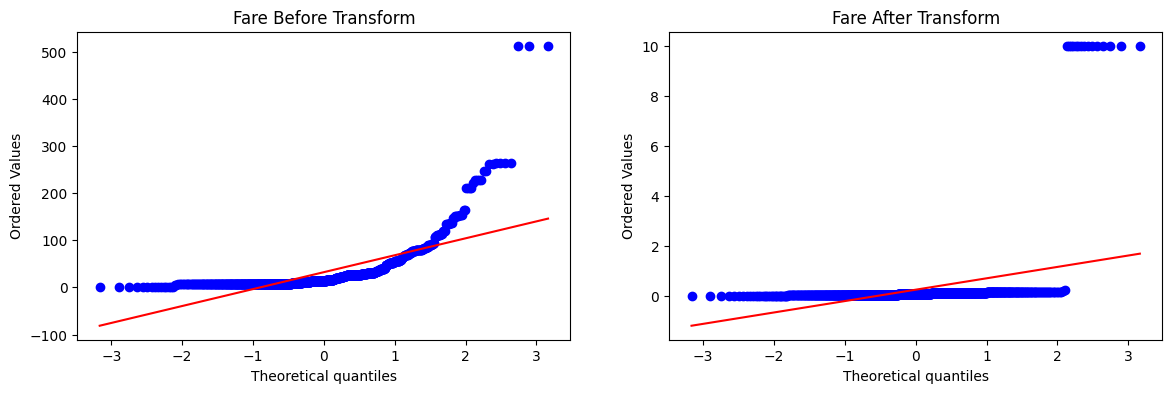

In [25]:
# call apply_transform function
# lambda x: 1 / (x + 0.1) applies inverse transformation
# 0.1 is added to avoid division by zero
# reduces impact of large Fare values
# highlights smaller Fare values
apply_transform(lambda x: 1 / (x + 0.1))

Accuracy 0.61729088639201


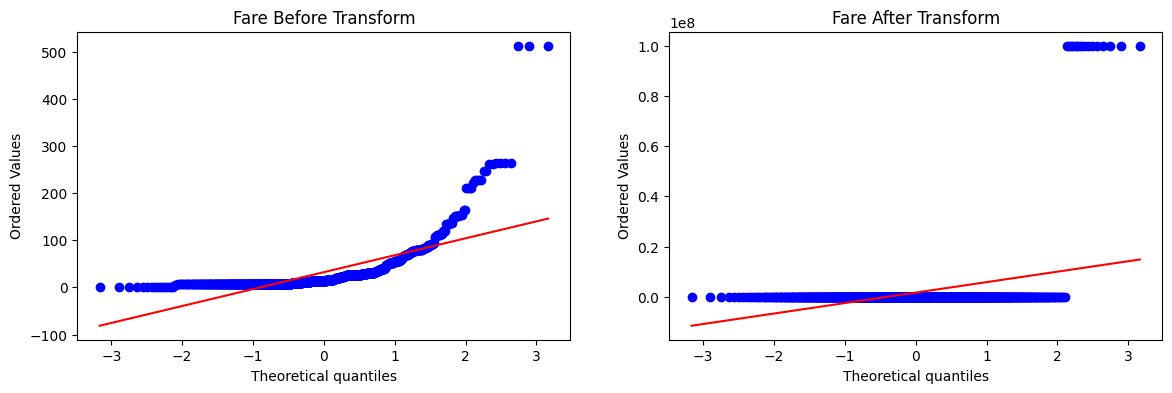

In [26]:
# call apply_transform function
# lambda x: 1 / (x + 0.00000001) applies inverse transformation
# very small value is added to avoid division by zero
# strongly reduces impact of large Fare values
# makes minimal change compared to adding 0.1
apply_transform(lambda x: 1 / (x + 0.00000001))

Accuracy 0.6195131086142323


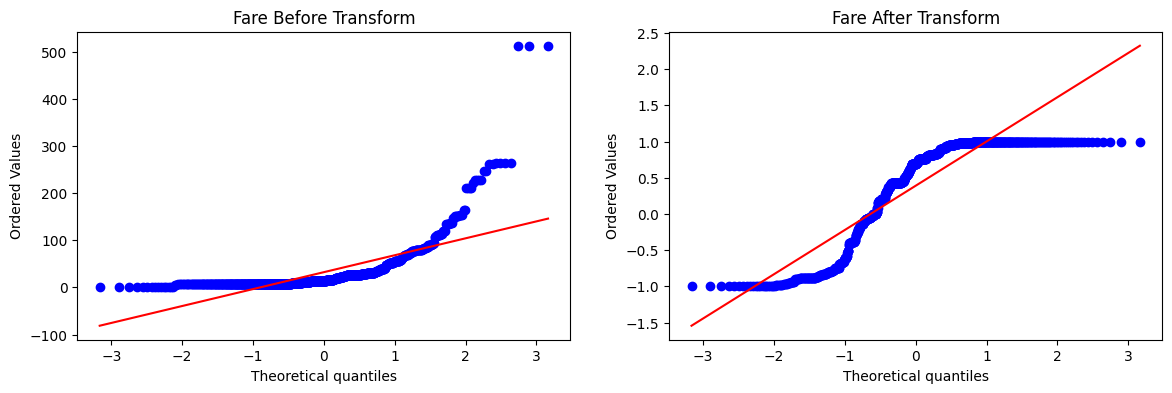

In [27]:
# call apply_transform function
# apply sine transformation using np.sin
# maps Fare values to range -1 to 1
# adds non linear and periodic behavior
# mainly used for experimentation
apply_transform(np.sin)